# Examples using RBM.py and Autoencoder.py

## RBM.py

The building block for pretraining our autoencoder. RBM.py defines a restricted Boltzmann machine object. In the following section we demonstrate how it works.

In [1]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt

from RBM import *
from Autoencoder import *

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load training data
df = pd.read_csv("train.csv")
x = df.values[:,1:]
x = x.T
x = (x > 0.35*255).astype(int)  # convert images from greyscale to black and white
x.shape

(784, 42000)

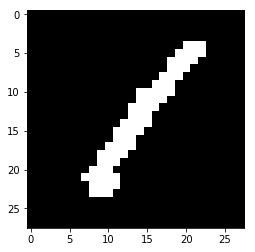

In [3]:
# here is an example of an image
plt.imshow(x[:,0].reshape((28,28)),cmap=plt.cm.gray)
plt.show()

In [4]:
# define a restricted Boltzmann machine
rbm = RBM(v_dim = 784, h_dim = 1000)

Epoch 1


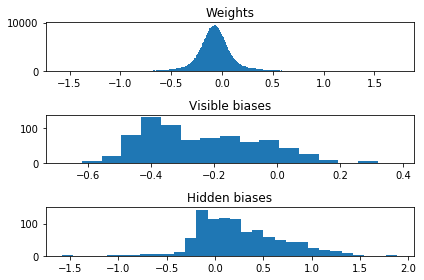

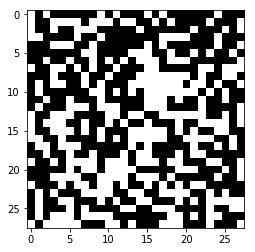

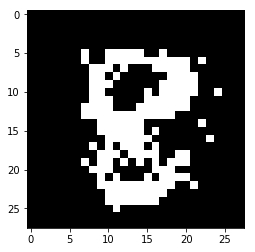

Epoch 2


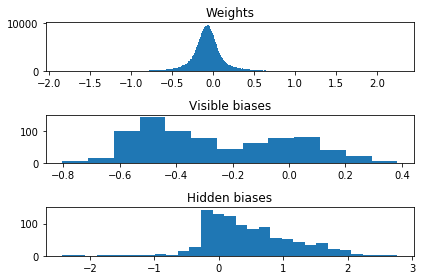

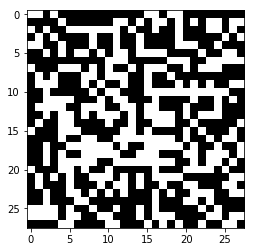

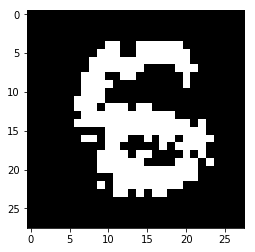

Epoch 3


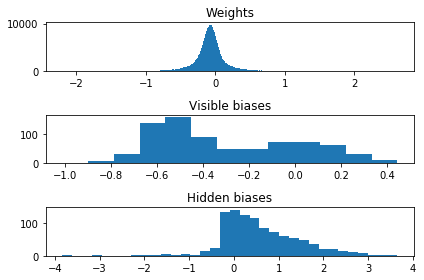

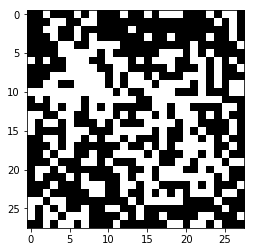

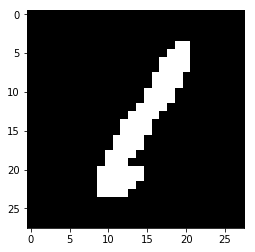

Epoch 4


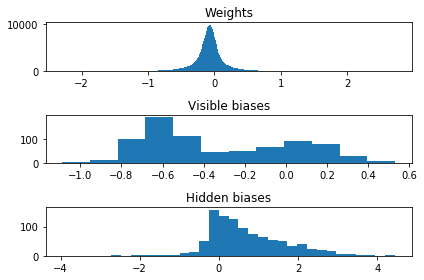

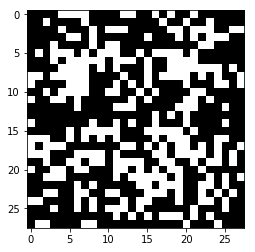

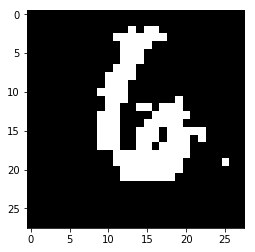

Epoch 5


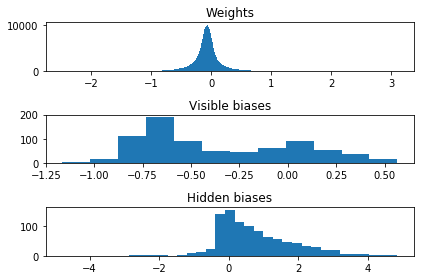

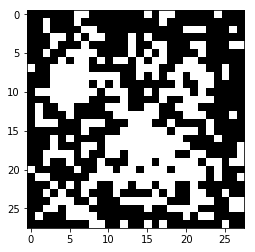

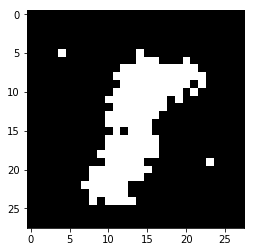

Epoch 6


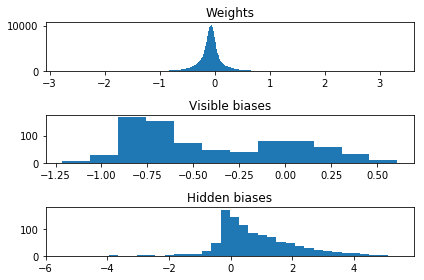

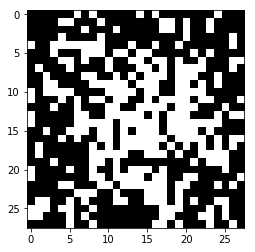

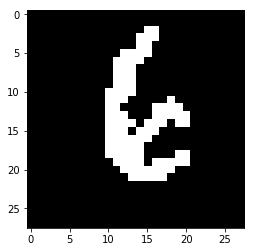

Epoch 7


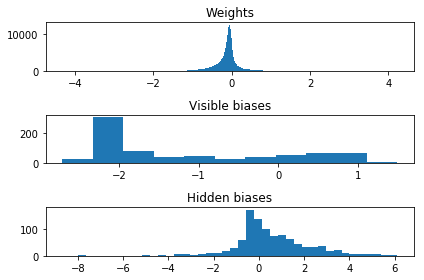

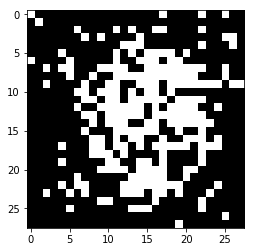

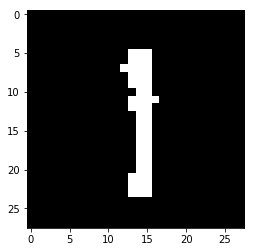

Epoch 8


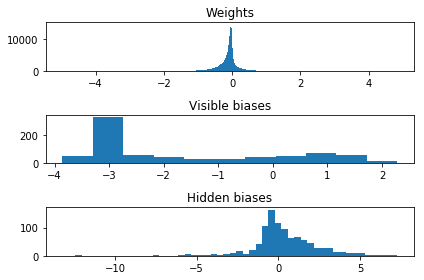

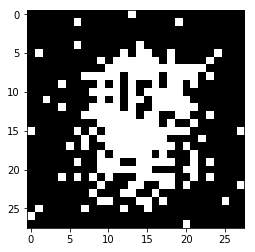

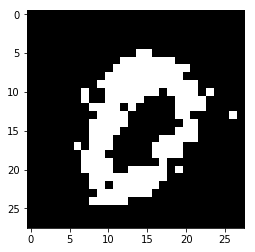

Epoch 9


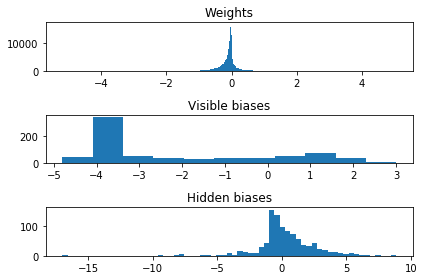

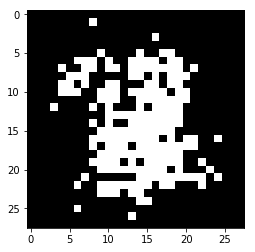

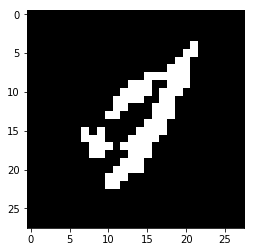

Epoch 10


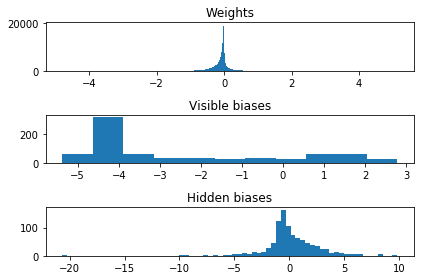

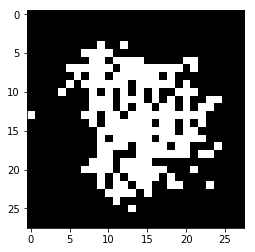

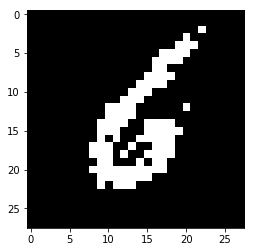

Epoch 11


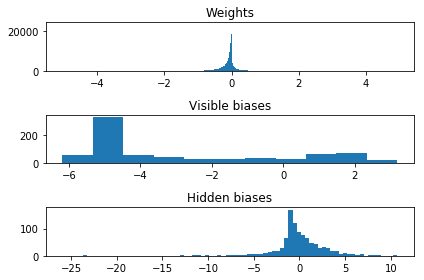

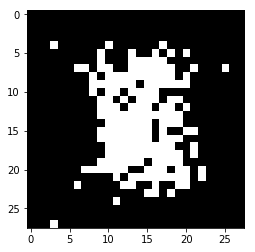

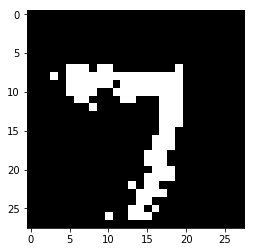

Epoch 12


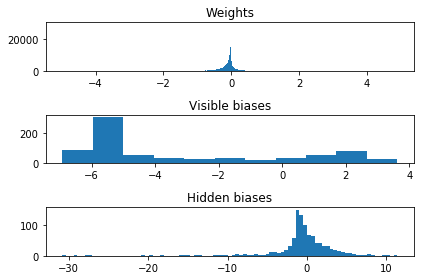

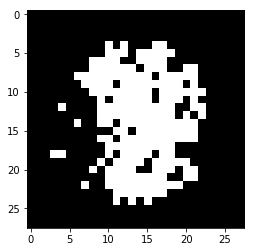

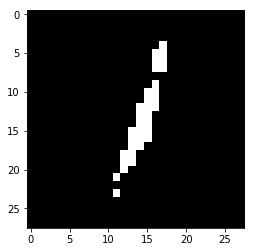

Epoch 13


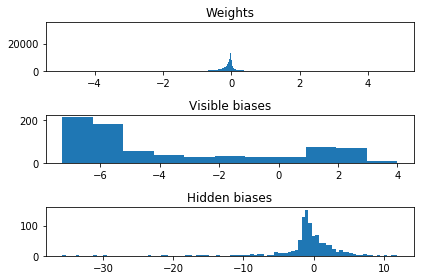

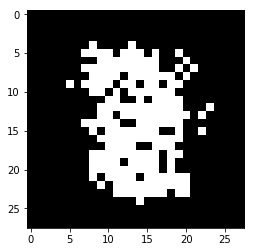

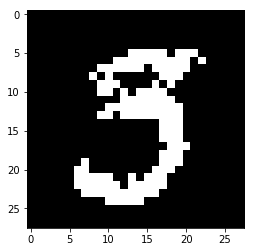

Epoch 14


KeyboardInterrupt: 

In [5]:
rbm.train(x, epochs = 50, batch_size = 20, learning_rate = .1, plot=True)

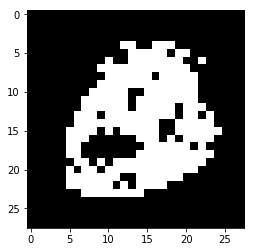

In [9]:
v,_ = rbm.gibbs_sampling(30,1)
plt.imshow(v.reshape((28,28)),cmap=plt.cm.gray)
plt.show()

In [7]:
rbm.save("RBMweights")  # save trained weights to a file.
trainedRbm = RBM.from_File("RBMweights") # create new instance with weights loaded from file

## Autoencoder.py

In [6]:
# define an Autoencoder
autoencoder = Autoencoder([784,1000,500,250,30])

Layer dimensions:
Layer 0: 784
Layer 1: 1000
Layer 2: 500
Layer 3: 250
Layer 4: 30


In [7]:
# pretrain the Autoencoder

# after training each RBM layer, num_samples are generated by 
# Gibb's sampling the hidden layer and used as input to the 
# visible layer of the next RBM

autoencoder.pretrain(x, epochs=15, num_samples=40000)

Training RBM layer 1
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Training RBM layer 2
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Training RBM layer 3
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Training RBM layer 4
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15


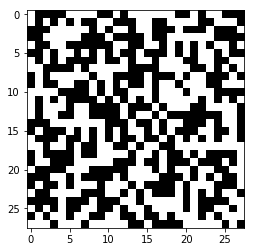

In [10]:
# we can take the first layer and see how well it is reconstructing the digits.
layer_1_weights = {'W':autoencoder.W[0],'a':autoencoder.a[0],'b':autoencoder.b[0]}
rbm = RBM.from_Values(layer_1_weights)
v,_ = rbm.gibbs_sampling(4,1)
plt.imshow(v.reshape((28,28)),cmap=plt.cm.gray)
plt.show()

In [8]:
# unroll the RBM's into a deep FF autoencoder and summarize the model
autoencoder.unroll()
autoencoder.autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 30)                7530      
_________________________________________________________________
dense_5 (Dense)              (None, 250)               7750      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               125500    
__________

In [10]:
# fine tune the autoencoder with minibatch gradient descent
autoencoder.train(x,epochs=8,learning_rate = 0.01,batch_size = 100)

Epoch 1/8
42000/42000 [==============================] - 30s 717us/step - loss: 0.4839
Epoch 2/8
42000/42000 [==============================] - 35s 840us/step - loss: 0.4839
Epoch 3/8
42000/42000 [==============================] - 31s 739us/step - loss: 0.4839
Epoch 4/8
42000/42000 [==============================] - 27s 653us/step - loss: 0.4839
Epoch 5/8
42000/42000 [==============================] - 27s 641us/step - loss: 0.4839
Epoch 6/8
42000/42000 [==============================] - 26s 625us/step - loss: 0.4839
Epoch 7/8
42000/42000 [==============================] - 26s 620us/step - loss: 0.4839
Epoch 8/8
42000/42000 [==============================] - 26s 627us/step - loss: 0.4839


# testing class methods

In [3]:
test = Autoencoder([784,10])

Layer dimensions:
Layer 0: 784
Layer 1: 10


In [4]:
test.pretrain(x,epochs=2,num_samples = 2)

Training RBM layer 1
Epoch 1
Epoch 2


In [5]:
test.save("pretrainedAutoencoder")

In [2]:
test1 = Autoencoder.pretrained_from_file("pretrainedAutoencoder")

Layer dimensions:
Layer 0: 784
Layer 1: 10


In [5]:
test1.pretrain(x,epochs=2,num_samples = 2)

Training RBM layer 1
Epoch 1
Epoch 2
